# Pré-processamento da Base de Dados:

### Importação das Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import factorize
import re

-----------------------------------------------

### Obtenção dos Datasets:

In [41]:
df = pd.DataFrame()
df = pd.read_csv('../../data/trabalho2_dados10.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,Ativa,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,Ativa,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,Ativa,2772,0.705882,3,3,2.102,2.102,2.102,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,Ativa,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,Ativa,161,0.400000,S/C,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,-3,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,Ativa,516,1.000000,4,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,Ativa,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,Ativa,885,0.600000,4,S/C,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,Ativa,2506,0.400000,3,3,2.3561,2.2901,0,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


---------------------------------

### Tratando Dados Categóricos:

In [42]:
df['Situacao'].loc[df['Situacao'] == 'Ativa'] = 1
df['Situacao'].loc[df['Situacao'] == 'Extinta'] = 0
df['Situacao'] = df['Situacao'].astype('int')
df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\964496517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Situacao'].loc[df['Situacao'] == 'Ativa'] = 1
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\964496517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Situacao'].loc[df['Situacao'] == 'Extinta'] = 0


,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,1,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,1,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,1,2772,0.705882,3,3,2.102,2.102,2.102,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,1,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,1,161,0.400000,S/C,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,-3,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,1,516,1.000000,4,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,1,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,1,885,0.600000,4,S/C,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,1,2506,0.400000,3,3,2.3561,2.2901,0,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


-------------------------------

### Tratamento de Dados Faltantes:

In [43]:
cols = ['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']
df_aux = df
for i in range(5):
    df_aux = df_aux.loc[(df_aux[cols[i]] != 'S/D') & (df_aux[cols[i]] != 'S/C')]

df_aux = df_aux.dropna(axis=0)

df_aux[['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']] = df_aux[['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']].apply(pd.to_numeric)

In [44]:
cols = ['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']
for i in range(5):
    df[cols[i]].loc[(df[cols[i]] == 'S/D')] = df_aux[cols[i]].median().astype('int')
    df[cols[i]].loc[(df[cols[i]] == 'S/C')] = df_aux[cols[i]].median().astype('int')
    df[cols[i]].loc[(df[cols[i]].isnull().values.any())] = df_aux[cols[i]].median().astype('int')

df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\233692353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]].loc[(df[cols[i]] == 'S/D')] = df_aux[cols[i]].median().astype('int')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\233692353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]].loc[(df[cols[i]] == 'S/C')] = df_aux[cols[i]].median().astype('int')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\233692353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,1,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,1,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,1,2772,0.705882,3,3,2.102,2.102,2.102,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,1,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,1,161,0.400000,4,3,2,2,2,0,0.000000,0,0.000000,-3,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,1,516,1.000000,4,3,2,2,2,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,1,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,1,885,0.600000,4,3,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,1,2506,0.400000,3,3,2.3561,2.2901,0,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


In [45]:
df.to_csv('../../data/df_without_nan.csv', index=False)

----------------------------------

### Tratamento de Dados Inconsistentes:

* Carregamento dos Datasets:

In [16]:
df = pd.read_csv('../../data/df_without_nan.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,1,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,1,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,1,2772,0.705882,3,3,2.1020,2.1020,2.1020,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,1,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,1,161,0.400000,4,3,2.0000,2.0000,2.0000,0,0.000000,0,0.000000,-3,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,1,516,1.000000,4,3,2.0000,2.0000,2.0000,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,1,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,1,885,0.600000,4,3,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,1,2506,0.400000,3,3,2.3561,2.2901,0.0000,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


* Tratando Dados Inconsistentes:

In [17]:
counts = (df < 0).sum(axis=0)
counts

Codigo da IES       0
Natureza            0
Situacao            0
DIAS                0
%                   0
CI N                0
CI V                0
IGC_N               1
IGC_M               4
IGC_V               2
EAD_17              0
variacao mat      657
mat_T 2017          0
% FIES              0
CURSOS             39
saldo 2017        237
Variacao 17-16    598
dtype: int64

In [20]:
cols = ['CURSOS', 'IGC_N', 'IGC_M', 'IGC_V']

df_aux = df
for i in range(4):
    df_aux = df_aux.loc[(df_aux[cols[i]] > 0)]

df_aux[['CURSOS', 'IGC_N', 'IGC_M', 'IGC_V']] = df_aux[['CURSOS', 'IGC_N', 'IGC_M', 'IGC_V']].apply(pd.to_numeric)

for i in range(4):
    df[cols[i]].loc[(df[cols[i]] < 0)] = int(df_aux[cols[i]].median())
    df[cols[i]].loc[(df[cols[i]] < 0)] = int(df_aux[cols[i]].median())

df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25736\2581429928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]].loc[(df[cols[i]] < 0)] = int(df_aux[cols[i]].median())
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25736\2581429928.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]].loc[(df[cols[i]] < 0)] = int(df_aux[cols[i]].median())
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25736\2581429928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,1,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,1,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,1,2772,0.705882,3,3,2.1020,2.1020,2.1020,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,1,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,1,161,0.400000,4,3,2.0000,2.0000,2.0000,0,0.000000,0,0.000000,5,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,1,516,1.000000,4,3,2.0000,2.0000,2.0000,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,1,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,1,885,0.600000,4,3,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,1,2506,0.400000,3,3,2.3561,2.2901,0.0000,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


In [22]:
df.to_csv('../../data/df_without_negative.csv', index=False)

-----------------------------------------

### Tratamento de Outliers:

In [29]:
df_1 = df.drop(columns={'saldo 2017', 'Variacao 17-16', 'mat_T 2017'})

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: >

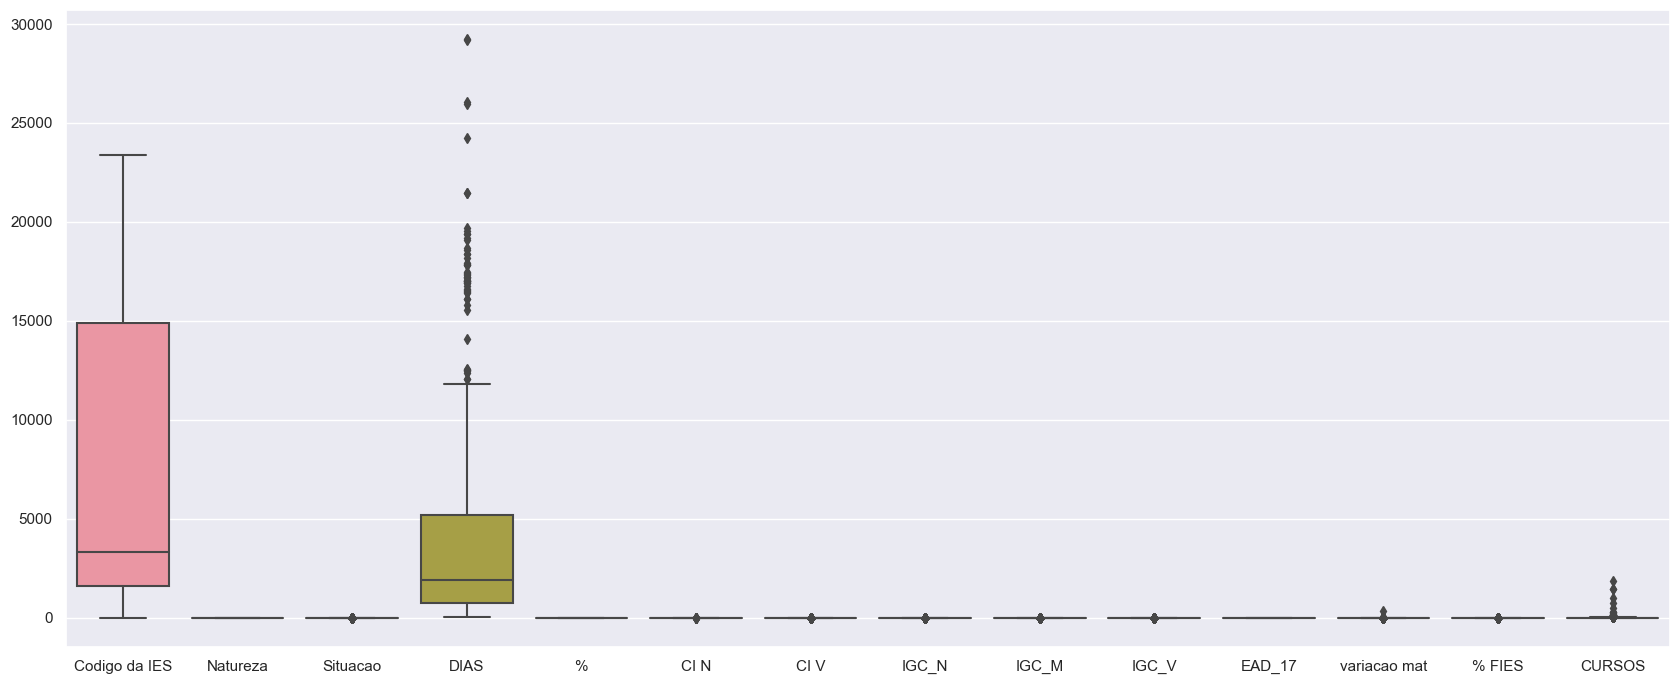

In [30]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.boxplot(df_1)

----------------------------

### Tratamento de Dados Irrelevantes:

---------------------------------------------